In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

<Axes: xlabel='datetime'>

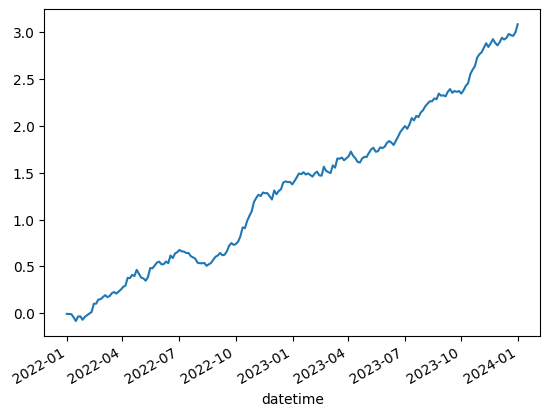

In [2]:
# Preparing returns without transaction cost

num_periods  = 200

start_date   = pd.to_datetime('2022-01-01')
end_date     = pd.to_datetime('2023-12-31')
trade_dates  = pd.to_datetime(np.sort(np.random.choice(pd.date_range(start=start_date, end=end_date, periods=num_periods + 1), num_periods, replace=False)))

df = pd.DataFrame({'datetime'  : trade_dates})
df['datetime' ] = pd.to_datetime(df['datetime'])
df['datetime_'] = df['datetime']
df = df.set_index('datetime')

outliers_percentage = 30
outliers_percentage = outliers_percentage/100.0
outliers_count      = int(num_periods*outliers_percentage)

percentage_changes = np.random.uniform(-0.045, 0.05, num_periods).astype(float)
extreme_returns    = np.random.uniform(-0.03,  0.1, outliers_count).astype(float)
outliers_date      = df['datetime_'].sample(n=outliers_count).to_list()
df[f"return"]      = percentage_changes

for outlier in list(zip(outliers_date, extreme_returns)):
    outlier_dt  = outlier[0]
    outlier_ret = outlier[1]
    df.loc[outlier_dt, f"return"] = outlier_ret

df.drop('datetime_', axis=1, inplace=True)

df['cum_return_test'] = df['return'].cumsum()

df['cum_return_test'].plot()

In [3]:
df

,return,cum_return_test
datetime,,
2022-01-01 00:00:00,-0.007043,-0.007043
2022-01-08 06:57:36,-0.002723,-0.009766
2022-01-11 22:26:24,-0.033390,-0.043155
2022-01-15 13:55:12,-0.040407,-0.083563
2022-01-19 05:24:00,0.048024,-0.035538
...,...,...
2023-12-16 10:04:48,0.042429,2.982165
2023-12-20 01:33:36,-0.013416,2.968749
2023-12-23 17:02:24,-0.006680,2.962069


In [4]:
# Applying different transaction costs

# 0.15% for the commission
# 0.2%  for the spread and slippage
commission_percentage      = 0.0015 # 0.15%
spread_slippage_percentage = 0.002  # 0.2%
transaction_cost_log_0     = np.log(1-commission_percentage) + np.log(1-spread_slippage_percentage)

# Applying transaction cost as 0.5%
transaction_cost_percentage = 0.005 # 0.5%
transaction_cost_log_1      = np.log(1-transaction_cost_percentage)

# Adjusting with the different transaction costs
df['log_return'           ] = (1 + df['return']).apply(np.log)
df['adjusted_log_return_0'] = df['log_return'] + transaction_cost_log_0 # commission 0.15%, slippage 0.2%
df['adjusted_log_return_1'] = df['log_return'] + transaction_cost_log_1 # single cost 0.5%


# cumulating returns 
df['cum_return'           ] = df['log_return'           ].cumsum().apply(np.exp)
df['adjusted_cum_return_0'] = df['adjusted_log_return_0'].cumsum().apply(np.exp)
df['adjusted_cum_return_1'] = df['adjusted_log_return_1'].cumsum().apply(np.exp)

df

,return,cum_return_test,log_return,adjusted_log_return_0,adjusted_log_return_1,cum_return,adjusted_cum_return_0,adjusted_cum_return_1
datetime,,,,,,,,
2022-01-01 00:00:00,-0.007043,-0.007043,-0.007068,-0.010571,-0.012080,0.992957,0.989485,0.987992
2022-01-08 06:57:36,-0.002723,-0.009766,-0.002727,-0.006230,-0.007739,0.990253,0.983340,0.980376
2022-01-11 22:26:24,-0.033390,-0.043155,-0.033960,-0.037463,-0.038972,0.957189,0.947182,0.942903
2022-01-15 13:55:12,-0.040407,-0.083563,-0.041246,-0.044749,-0.046259,0.918512,0.905731,0.900279
2022-01-19 05:24:00,0.048024,-0.035538,0.046907,0.043403,0.041894,0.962623,0.945908,0.938797
...,...,...,...,...,...,...,...,...
2023-12-16 10:04:48,0.042429,2.982165,0.041554,0.038051,0.036541,17.220150,8.666517,6.447046
2023-12-20 01:33:36,-0.013416,2.968749,-0.013507,-0.017010,-0.018519,16.989126,8.520347,6.328750
2023-12-23 17:02:24,-0.006680,2.962069,-0.006703,-0.010206,-0.011715,16.875634,8.433833,6.255040


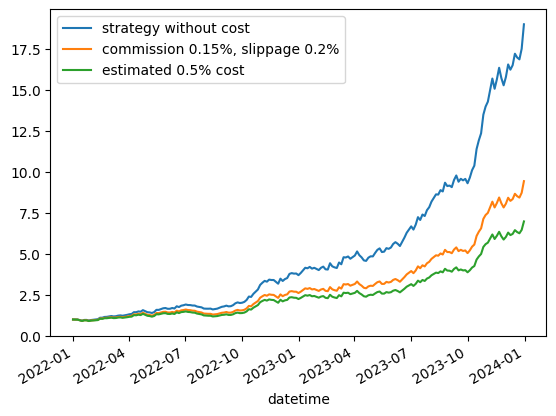

In [5]:
df[['cum_return', 'adjusted_cum_return_0', 'adjusted_cum_return_1']].plot()
plt.legend(['strategy without cost', 'commission 0.15%, slippage 0.2%', 'estimated 0.5% cost'])